# Stratify proteins into functional classes based on UniProtKB keywords, experimentally identified adaptors & experimentally identified scaffold proteins

In [1]:
# Author: Lisa Boatner
# Date Created: 221128
# Date Modified: 221206
# Updates: 

# Import Modules 

In [2]:
import os, sys
import numpy as np
import pandas as pd
import seaborn as sns
import string
from matplotlib import pyplot as plt

In [3]:
# assuming current directory is main folder
os.chdir('data')
cd = os.getcwd()
cd

'C:\\Users\\Onee-sama\\Documents\\GitHub\\protein_function_annotations\\protein_function_classifications\\data'

In [4]:
# set the date for naming files
date = '2401'

# 

# UniProtKB 

## Download UniProt File with columns: Entry, Entry Name, Protein Names, Gene Names,  Description, Keywords
## https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgene_primary%2Cgene_synonym%2Ckeyword&format=xlsx&query=%28Human%29+AND+%28model_organism%3A9606%29+AND+%28reviewed%3Atrue%29&size=500

In [5]:
u_df = pd.read_excel('uniprotkb_Human_AND_model_organism_9606_2024_06_25.xlsx')

C:\ProgramData\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [6]:
u_df.shape

(20435, 10)

In [7]:
u_df.head()

,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Gene Names (primary),Gene Names (synonym),Keywords
0,A0A087X1C5,reviewed,CP2D7_HUMAN,Putative cytochrome P450 2D7 (EC 1.14.14.1),CYP2D7,Homo sapiens (Human),515,CYP2D7,NaN,Cytoplasm;Glycoprotein;Heme;Iron;Membrane;Meta...
1,A0A0B4J2F0,reviewed,PIOS1_HUMAN,Protein PIGBOS1 (PIGB opposite strand protein 1),PIGBOS1,Homo sapiens (Human),54,PIGBOS1,NaN,Direct protein sequencing;Membrane;Mitochondri...
2,A0A0B4J2F2,reviewed,SIK1B_HUMAN,Putative serine/threonine-protein kinase SIK1B...,SIK1B,Homo sapiens (Human),783,SIK1B,NaN,ATP-binding;Kinase;Magnesium;Metal-binding;Nuc...
3,A0A0C5B5G6,reviewed,MOTSC_HUMAN,Mitochondrial-derived peptide MOTS-c (Mitochon...,MT-RNR1,Homo sapiens (Human),16,MT-RNR1,NaN,DNA-binding;Mitochondrion;Nucleus;Osteogenesis...
4,A0A0K2S4Q6,reviewed,CD3CH_HUMAN,Protein CD300H (CD300 antigen-like family memb...,CD300H,Homo sapiens (Human),201,CD300H,NaN,Alternative splicing;Disulfide bond;Glycoprote...


In [8]:
u_df.columns.to_list()

['Entry',
 'Reviewed',
 'Entry Name',
 'Protein names',
 'Gene Names',
 'Organism',
 'Length',
 'Gene Names (primary)',
 'Gene Names (synonym)',
 'Keywords']

# 

# Human Protein Atlas FDA

## Download Human Protein Atlas version 22.0
## https://www.proteinatlas.org/about/download

In [9]:
h_df = pd.read_table('proteinatlas.tsv')

In [10]:
h_df.shape

(20162, 89)

In [11]:
h_df.head()

,Gene,Gene synonym,Ensembl,Gene description,Uniprot,Chromosome,Position,Protein class,Biological process,Molecular function,...,Pathology prognostics - Lung cancer,Pathology prognostics - Melanoma,Pathology prognostics - Ovarian cancer,Pathology prognostics - Pancreatic cancer,Pathology prognostics - Prostate cancer,Pathology prognostics - Renal cancer,Pathology prognostics - Stomach cancer,Pathology prognostics - Testis cancer,Pathology prognostics - Thyroid cancer,Pathology prognostics - Urothelial cancer
0,TSPAN6,"T245, TM4SF6, TSPAN-6",ENSG00000000003,Tetraspanin 6,O43657,X,100627108-100639991,"Predicted intracellular proteins, Predicted me...",NaN,NaN,...,unprognostic (1.09e-2),unprognostic (1.19e-2),unprognostic (1.80e-3),unprognostic (2.04e-3),unprognostic (8.76e-2),unprognostic (3.83e-3),unprognostic (4.28e-2),unprognostic (1.14e-1),unprognostic (2.24e-1),unprognostic (9.54e-3)
1,TNMD,"BRICD4, ChM1L, myodulin, TEM, tendin",ENSG00000000005,Tenomodulin,Q9H2S6,X,100584936-100599885,Predicted membrane proteins,NaN,NaN,...,NaN,NaN,unprognostic (2.15e-1),unprognostic (2.36e-2),unprognostic (1.37e-1),unprognostic (9.40e-2),unprognostic (9.60e-4),unprognostic (6.82e-2),unprognostic (5.67e-2),unprognostic (1.48e-1)
2,DPM1,"CDGIE, MPDS",ENSG00000000419,Dolichyl-phosphate mannosyltransferase subunit...,O60762,20,50934867-50959140,"Disease related genes, Enzymes, Human disease ...",NaN,"Glycosyltransferase, Transferase",...,unprognostic (1.10e-1),unprognostic (7.49e-2),unprognostic (2.53e-2),unprognostic (1.29e-2),unprognostic (3.61e-2),unprognostic (3.02e-3),unprognostic (4.98e-2),unprognostic (2.59e-1),unprognostic (3.58e-1),unprognostic (2.74e-1)
3,SCYL3,"PACE-1, PACE1",ENSG00000000457,SCY1 like pseudokinase 3,Q8IZE3,1,169849631-169894267,"Enzymes, Predicted intracellular proteins",NaN,NaN,...,unprognostic (2.12e-2),unprognostic (2.85e-2),unprognostic (7.17e-2),unprognostic (8.80e-2),unprognostic (9.88e-2),unprognostic (1.20e-3),unprognostic (3.54e-1),unprognostic (1.75e-1),unprognostic (4.60e-2),prognostic favorable (8.85e-4)
4,C1orf112,FLJ10706,ENSG00000000460,Chromosome 1 open reading frame 112,Q9NSG2,1,169662007-169854080,Predicted intracellular proteins,NaN,NaN,...,unprognostic (2.09e-1),unprognostic (9.11e-3),unprognostic (8.79e-2),unprognostic (3.47e-3),unprognostic (5.97e-2),unprognostic (1.65e-8),unprognostic (1.76e-1),unprognostic (2.81e-2),unprognostic (6.17e-2),unprognostic (2.63e-1)


In [12]:
# create FDA label
h_fda = h_df['Protein class'].str.contains('FDA approved drug targets')
h_df['HPA'] = True
h_df['FDA'] = h_fda

In [13]:
# identify known transcription factors
h_tf = h_df['Protein class'].str.contains('Transcription factors')
h_df['known_transcription_factors'] = h_tf

In [14]:
# identify known channels
h_transporters = (h_df['Protein class'].str.contains('Transporters')) | (h_df['Protein class'].str.contains('Voltage-gated ion channels'))
h_df['known_transporters_channels'] = h_transporters

In [15]:
# subset dataframe for only columns we want
subset_h_df = h_df[['Uniprot', 'Protein class', 'Disease involvement', 'known_transcription_factors', 'known_transporters_channels', 'FDA', "HPA"]]
subset_h_df = subset_h_df[subset_h_df['Uniprot'].notna()]
subset_h_df = subset_h_df.drop_duplicates()
subset_h_df.shape

(19189, 7)

In [16]:
# subset unique proteins
non_duplicates = subset_h_df.drop_duplicates(subset = ['Uniprot'], keep = False)
non_duplicates.shape

(19169, 7)

In [17]:
# identify duplicate proteins
duplicates = subset_h_df[subset_h_df['Uniprot'].duplicated(keep = False)]
duplicates.shape

(20, 7)

In [18]:
# remove duplicate protein ids and keep the protein with the longest functional annotation
def get_remove_ids(df):
    
    remove_ids = []
    
    groups = df.groupby('Uniprot')
    
    for name, group in groups:
        max_len = max(group['str_length'])
        remove_id = group[group['str_length'] != max_len]
        
        remove_ids.append(int(remove_id['id']))
    
    return remove_ids

In [19]:
# track row indices 
duplicates['id'] = duplicates.index
duplicates['str_length'] = duplicates['Protein class'].str.len()

C:\Users\Onee-sama\AppData\Local\Temp\ipykernel_8704\4285074463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicates['id'] = duplicates.index
C:\Users\Onee-sama\AppData\Local\Temp\ipykernel_8704\4285074463.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicates['str_length'] = duplicates['Protein class'].str.len()


In [20]:
# keep protein with longest annotation
remove_ids = get_remove_ids(duplicates)
duplicates['Keep'] = np.where(duplicates['id'].isin(remove_ids), False, True)
kept_duplicates = duplicates[duplicates['Keep'] == True]
final_subset_h_df = pd.concat([non_duplicates, kept_duplicates])
final_subset_h_df = final_subset_h_df.drop(columns = ['Keep'])

C:\Users\Onee-sama\AppData\Local\Temp\ipykernel_8704\1615641837.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicates['Keep'] = np.where(duplicates['id'].isin(remove_ids), False, True)


# 

# Merge UniProtKB and HPA annotations 

In [21]:
# merge UniProtKB and HPA annotations
merged_df = u_df.merge(final_subset_h_df, left_on='Entry', right_on='Uniprot', how='left')
merged_df.shape

(20435, 19)

# 

# Read experimentally identified adaptors and scaffolds

In [22]:
adaptor_df = pd.read_csv('adaptor_ids.csv')
adaptor_df = adaptor_df.dropna()
adaptor_df['known_adaptors'] = True
adaptor_ids = adaptor_df['Known Adaptor Proteins'].str.strip().unique()

In [23]:
scaffold_df = pd.read_csv('scaffold_ids.csv')
scaffold_df['known_scaffolds'] = True
scaffold_ids = scaffold_df['Known Scaffold Protein'].str.strip().unique()

In [24]:
def get_known(df, known_list):
    known = []
    for index, row in df.iterrows():
        current = row['Gene Names (primary)']
        found = False
        if current is np.nan:
            known.append(found)
            continue
        for i in range(len(known_list)):
            if known_list[i].strip() in current:
                found = True
                
        known.append(found)
    return known

In [25]:
known_adaptors = get_known(merged_df, adaptor_ids)
merged_df['known_adaptors'] = known_adaptors

In [26]:
known_scaffolds = get_known(merged_df, scaffold_ids)
merged_df['known_scaffolds'] = known_scaffolds

In [27]:
panther_df = pd.read_csv('panther_scaffold_ids.csv')
panther_df['panther_scaffold'] = True
panther_scaffold_ids = panther_df['protein'].str.strip().unique()

# 

# Merge UniProtKB, HPA and known adaptors and scaffolds

In [28]:
final_df = pd.merge(merged_df, panther_df, left_on = 'Entry', right_on = 'protein', how = 'left')
final_df.shape

(20435, 23)

In [29]:
final_df.columns.to_list()

['Entry',
 'Reviewed',
 'Entry Name',
 'Protein names',
 'Gene Names',
 'Organism',
 'Length',
 'Gene Names (primary)',
 'Gene Names (synonym)',
 'Keywords',
 'Uniprot',
 'Protein class',
 'Disease involvement',
 'known_transcription_factors',
 'known_transporters_channels',
 'FDA',
 'HPA',
 'id',
 'str_length',
 'known_adaptors',
 'known_scaffolds',
 'protein',
 'panther_scaffold']

In [30]:
# remove extraneous columns
final_df = final_df.drop(columns = ['id',
                                    'str_length',
                                    'protein'])

In [31]:
final_df.head()

,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Gene Names (primary),Gene Names (synonym),Keywords,Uniprot,Protein class,Disease involvement,known_transcription_factors,known_transporters_channels,FDA,HPA,known_adaptors,known_scaffolds,panther_scaffold
0,A0A087X1C5,reviewed,CP2D7_HUMAN,Putative cytochrome P450 2D7 (EC 1.14.14.1),CYP2D7,Homo sapiens (Human),515,CYP2D7,NaN,Cytoplasm;Glycoprotein;Heme;Iron;Membrane;Meta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN
1,A0A0B4J2F0,reviewed,PIOS1_HUMAN,Protein PIGBOS1 (PIGB opposite strand protein 1),PIGBOS1,Homo sapiens (Human),54,PIGBOS1,NaN,Direct protein sequencing;Membrane;Mitochondri...,A0A0B4J2F0,Predicted intracellular proteins,NaN,False,False,False,True,False,False,NaN
2,A0A0B4J2F2,reviewed,SIK1B_HUMAN,Putative serine/threonine-protein kinase SIK1B...,SIK1B,Homo sapiens (Human),783,SIK1B,NaN,ATP-binding;Kinase;Magnesium;Metal-binding;Nuc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN
3,A0A0C5B5G6,reviewed,MOTSC_HUMAN,Mitochondrial-derived peptide MOTS-c (Mitochon...,MT-RNR1,Homo sapiens (Human),16,MT-RNR1,NaN,DNA-binding;Mitochondrion;Nucleus;Osteogenesis...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN
4,A0A0K2S4Q6,reviewed,CD3CH_HUMAN,Protein CD300H (CD300 antigen-like family memb...,CD300H,Homo sapiens (Human),201,CD300H,NaN,Alternative splicing;Disulfide bond;Glycoprote...,A0A0K2S4Q6,"Predicted membrane proteins, Predicted secrete...",NaN,False,False,False,True,False,False,NaN


# 

# Classify each protein based on keywords and experimental annotations

In [32]:
def get_kw_results(df, kw_lst, extra_lst, extra_col):
    
    kw_results = []
    
    for index, row in df.iterrows():

        current_kw = row['Keywords'].lower()
        
        count = 0
        for i in range(len(kw_lst)):
            if kw_lst[i].lower() in current_kw:
                count += 1
                
        extra_kw = str(row[extra_col]).lower()
        
        for j in range(len(extra_lst)):
            if extra_lst[j].lower() in extra_kw:
                count += 1
                
        if count > 0:
            kw_results.append('yes')
        else:
            kw_results.append('')
            
    return kw_results

In [33]:
def get_special_kw_results(df, kw_lst, extra_lst, extra_col, special):
    kw_results = []
    for index, row in df.iterrows():

        current_kw = row['Keywords'].lower()
        
        count = 0
        for i in range(len(kw_lst)):
            if kw_lst[i].lower() in current_kw:
                count += 1
                
        extra_kw = str(row[extra_col]).lower()
        
        for j in range(len(extra_lst)):
            if extra_lst[j].lower() in extra_kw:
                count += 1
         
        for k in range(len(special)):
            known = row[special[k]]
            if known == True:
                count += 1
                
        if count > 0:
            kw_results.append('yes')
        else:
            kw_results.append('')
            
    return kw_results

# 

## Establish keywords for each class 

In [34]:
tmp = final_df.copy()

In [35]:
enzyme_kw = ['enzyme', 'Translocase', 'Glycosyltransferase', 'Oxidoreductase', 'Carboxypeptidase', 'Aminoacyl-tRNA synthetase', 'Kinase', 'Hydrolase', 'Acyltransferase', 'Ligase', 'Transferase', 'Isomerase', 'Exonuclease', 'Dioxygenase', 'Decarboxylase', ' Peroxidase', 'Nucleotidyltransferase', 'Methyltransferase', 'Glycosidase', 'Lyase', 'Helicase', 'Aminopeptidase', 'Aspartyl protease', 'Aminotransferase', ' Transferase', ' Hydrolase', ' Ligase', ' Protease', ' Serine/threonine-protein kinase', ' Glycosyltransferase', ' Kinase', ' Rotamase', ' Oxidoreductase', ' Lyase', ' Endonuclease', ' Protein phosphatase', ' Methyltransferase', ' Helicase', ' Dioxygenase', ' Isomerase', ' DNA-directed DNA polymerase', ' Serine esterase', ' Metalloprotease', ' Thiol protease', ' Nuclease', ' Threonine protease', ' Serine protease', ' Tyrosine-protein kinase', ' Nucleotidyltransferase', 'GTPase', 'DNA polymerase', 'DNA-directed RNA polymerase', 'Redox-active center', 'Multicatalytic endopeptidase']

In [36]:
chap_kw = ['chaperone', 'transporter', 'protein transport', 'receptor', 'channel', 'Peroxisome biogenesis', 'coated-pit', 'motor protein']

In [37]:
bind_kw = ['DNA-binding', 'RNA-binding', 'Nucleotide-binding', 'Metal-binding', 'NADP', 'NAD', 'FAD', 'FMN', 'Flavoprotein', 'Pyridine nucleotide biosynthesis']

In [38]:
trans_kw = ['initiator', 'transcription factor', 'transcription', 'transcription regulation', 'translation regulation', 'activator', 'repressor', 'initiation', 'signal recognition', 'Zinc-finger', 'enhancer', 'GTP', 'GDP', 'ATP', 'ADP', 'ribosomal protein', 'ribonucleoprotein', 'camp', 'cyclin', 'elongation factor']

In [39]:
scaff_kw = ['microtubule', 'filament', 'actin', 'hynein', 'dynein', 'intermediate filament', 'adhesion', 'scaffold', 'modulator', 'adaptor', 'adapter', 'calmodulin-binding', 'condensin', 'elongation factor', 'condensation']

# 

## Search columns for specific keywords 

In [40]:
extra_cols = []
extra_words = []
enz_results = get_kw_results(tmp, enzyme_kw, extra_words, extra_cols)
tmp['enzyme'] = enz_results

In [41]:
extra_cols = []
extra_words = []
bind_results = get_kw_results(tmp, bind_kw, extra_words, extra_cols)
tmp['nucleic_acid_and_small_molecule_binding'] = bind_results

In [42]:
extra_cols = []
extra_words = []
special = ['known_transporters_channels']
chap_results = get_special_kw_results(tmp, chap_kw, extra_words, extra_cols, special)
tmp['chaperone_transporter_channel_receptor'] = chap_results

In [43]:
# extra_cols = ['Protein names']
# extra_words = ['scaffold', 'adapter', 'modulator', 'adaptor']
extra_cols = []
extra_words = []
special = ['known_scaffolds', 'known_adaptors']
scaff_results = get_special_kw_results(tmp, scaff_kw, extra_words, extra_cols, special)
tmp['scaffolding_modulator_adaptor'] = scaff_results

In [44]:
# extra_cols = ['Gene description']
# extra_words = ['initiator', 'enhancer', 'transcription factor', 'activator', 'repressor', 'initiation', 'suppressor']
extra_cols = []
extra_words = []
special = ['known_transcription_factors']
trans_results = get_special_kw_results(tmp, trans_kw, extra_words, extra_cols, special)
tmp['transcriptional_factor_regulator'] = trans_results

# 

## Determine one class per protein based on order: enzyme > receptor > scaffold > transcription factor > nucleic acid > uncategorized

In [45]:
def get_one_class(df):
    classes = []
    
    for index, row in df.iterrows():
        classification = ''
        
        enzyme = row['enzyme']
        trans = row['transcriptional_factor_regulator']
        bind = row['nucleic_acid_and_small_molecule_binding']
        scaff = row['scaffolding_modulator_adaptor']
        chap = row['chaperone_transporter_channel_receptor']
        
        if enzyme == 'yes':
            classification = 'Enzyme'
            classes.append(classification)
            continue
        elif chap == 'yes':
            classification = 'Chaperone, Transporter, Channel, Receptor'
            classes.append(classification)
            continue
        elif scaff == 'yes':
            classification = 'Scaffolding, Modulator, Adaptor'
            classes.append(classification)
            continue
        elif trans == 'yes':
            classification = 'Transcriptional Factor, Regulator'
            classes.append(classification)
            continue
        elif bind == 'yes':
            classification = 'Nucleic Acid and Small Molecule Binding'
            classes.append(classification)
            continue
        else:
            classification = 'Uncategorized'
            classes.append(classification)
            continue
        
    return classes

In [46]:
classes = get_one_class(tmp)
tmp['Classification'] = classes

In [47]:
tmp['Classification'].value_counts()

Uncategorized                                6725
Enzyme                                       4923
Chaperone, Transporter, Channel, Receptor    3838
Transcriptional Factor, Regulator            3075
Scaffolding, Modulator, Adaptor              1159
Nucleic Acid and Small Molecule Binding       715
Name: Classification, dtype: int64

# 

# Write output 

In [48]:
tmp.head()

,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Gene Names (primary),Gene Names (synonym),Keywords,...,HPA,known_adaptors,known_scaffolds,panther_scaffold,enzyme,nucleic_acid_and_small_molecule_binding,chaperone_transporter_channel_receptor,scaffolding_modulator_adaptor,transcriptional_factor_regulator,Classification
0,A0A087X1C5,reviewed,CP2D7_HUMAN,Putative cytochrome P450 2D7 (EC 1.14.14.1),CYP2D7,Homo sapiens (Human),515,CYP2D7,NaN,Cytoplasm;Glycoprotein;Heme;Iron;Membrane;Meta...,...,NaN,False,False,NaN,yes,yes,,,,Enzyme
1,A0A0B4J2F0,reviewed,PIOS1_HUMAN,Protein PIGBOS1 (PIGB opposite strand protein 1),PIGBOS1,Homo sapiens (Human),54,PIGBOS1,NaN,Direct protein sequencing;Membrane;Mitochondri...,...,True,False,False,NaN,,,,,,Uncategorized
2,A0A0B4J2F2,reviewed,SIK1B_HUMAN,Putative serine/threonine-protein kinase SIK1B...,SIK1B,Homo sapiens (Human),783,SIK1B,NaN,ATP-binding;Kinase;Magnesium;Metal-binding;Nuc...,...,NaN,False,False,NaN,yes,yes,,,yes,Enzyme
3,A0A0C5B5G6,reviewed,MOTSC_HUMAN,Mitochondrial-derived peptide MOTS-c (Mitochon...,MT-RNR1,Homo sapiens (Human),16,MT-RNR1,NaN,DNA-binding;Mitochondrion;Nucleus;Osteogenesis...,...,NaN,False,False,NaN,,yes,,,yes,"Transcriptional Factor, Regulator"
4,A0A0K2S4Q6,reviewed,CD3CH_HUMAN,Protein CD300H (CD300 antigen-like family memb...,CD300H,Homo sapiens (Human),201,CD300H,NaN,Alternative splicing;Disulfide bond;Glycoprote...,...,True,False,False,NaN,,,,,,Uncategorized


In [49]:
tmp.columns.to_list()

['Entry',
 'Reviewed',
 'Entry Name',
 'Protein names',
 'Gene Names',
 'Organism',
 'Length',
 'Gene Names (primary)',
 'Gene Names (synonym)',
 'Keywords',
 'Uniprot',
 'Protein class',
 'Disease involvement',
 'known_transcription_factors',
 'known_transporters_channels',
 'FDA',
 'HPA',
 'known_adaptors',
 'known_scaffolds',
 'panther_scaffold',
 'enzyme',
 'nucleic_acid_and_small_molecule_binding',
 'chaperone_transporter_channel_receptor',
 'scaffolding_modulator_adaptor',
 'transcriptional_factor_regulator',
 'Classification']

In [50]:
tmp.to_csv(date + '_uniprot_annotated_function.csv', index = False)

# 

# Read Experimental Results 

In [51]:
# read csv file, specify enrichment at the protein level or cysteine level
# specify the name of the csv file you want to analyze
# ex. filename: 'compiled_proteins.csv'
df = pd.read_csv('compiled_proteins.csv')

In [52]:
df.shape

(1710, 32)

In [53]:
df.head()

,protein,description,gene,identifiers,peptides,peptide_count,spectral_count,modifications,modification_count,amino_acids,...,Experiment-1_avg_of_medians,Experiment-2_avg_of_medians,Experiment-1_stdev_of_medians,Experiment-2_stdev_of_medians,total_quant_list,Experiment-1_Exp1_Replicate-2_median,Experiment-1_Exp1_Replicate-1_median,Experiment-2_Exp2-Replicate-1_median,Experiment-2_Exp2-Replicate-2_median,Unnamed: 31
0,Q86X55,Histone-arginine methyltransferase CARM1,CARM1,Q86X55_C26,AAAAAAVGPGAGGAGSAVPGGAGPC*ATVSVFPGAR,1,3,25_C[527.3213];25_C[521.3074],2,C,...,1.291182,1.295200,NaN,NaN,1.2911815216979126;1.295200001608753,1.291182,NaN,1.295200,NaN,NaN
1,Q99615,DnaJ homolog subfamily C member 7,DNAJC7,Q99615_C7,AAAAEC*DVVMAATEPELLDDQEAKR,1,3,6_C[521.3074];6_C[527.3213],2,C,...,1.347838,4.039893,NaN,NaN,1.3478380214036192;4.039893401046718,1.347838,NaN,4.039893,NaN,NaN
2,Q5SRE5,Nucleoporin NUP188 homolog,NUP188,Q5SRE5_C9;Q5SRE5_C1270,AAAAGGPC*VR;HSLALGSATEDKDSMETDDC*SR,2,4,8_C[527.3213];8_C[521.3074];20_C[527.3213];20_...,4,C,...,1.020498,0.846141,NaN,NaN,1.0204981401893118;0.8102536010867071;0.882029...,1.020498,NaN,0.846141,NaN,NaN
3,Q8IYU8,Calcium uptake protein 2; mitochondrial,MICU2,Q8IYU8_C8,AAAAGSC*AR,1,2,7_C[527.3213];7_C[521.3074],2,C,...,1.050002,NaN,NaN,NaN,1.0500022223666556,1.050002,NaN,NaN,NaN,NaN
4,Q9NRL3,Striatin-4,STRN4,Q9NRL3_C17,AAAAVAAAASSC*RPLGSGAGPGPTGAAPVSAPAPGPGPAGK,1,2,12_C[527.3213];12_C[521.3074],2,C,...,1.432112,NaN,NaN,NaN,1.432112392544983,1.432112,NaN,NaN,NaN,NaN


In [54]:
df.columns.to_list()

['protein',
 'description',
 'gene',
 'identifiers',
 'peptides',
 'peptide_count',
 'spectral_count',
 'modifications',
 'modification_count',
 'amino_acids',
 'amino_acid_count',
 'modification_masses',
 'no_of_experiments_count',
 'no_of_replicates_count',
 'Experiment-1_experiment_count',
 'Experiment-2_experiment_count',
 'Experiment-1_Exp1_Replicate-2_replicate_count',
 'Experiment-1_Exp1_Replicate-1_replicate_count',
 'Experiment-2_Exp2-Replicate-1_replicate_count',
 'Experiment-2_Exp2-Replicate-2_replicate_count',
 'aggregate_avg_of_avg_of_medians',
 'aggregate_stdev_of_avg_of_medians',
 'Experiment-1_avg_of_medians',
 'Experiment-2_avg_of_medians',
 'Experiment-1_stdev_of_medians',
 'Experiment-2_stdev_of_medians',
 'total_quant_list',
 'Experiment-1_Exp1_Replicate-2_median',
 'Experiment-1_Exp1_Replicate-1_median',
 'Experiment-2_Exp2-Replicate-1_median',
 'Experiment-2_Exp2-Replicate-2_median',
 'Unnamed: 31']

In [55]:
# # subset dataset based on criteria
# df = df[df[['your_column_name'] == 'specific_value']]
# specify experimental group as all genes with 
# log2ratio >= X or log2ratio <= X
# ex. column name for selecting cutoff: 'aggregate_avg_of_avg_of_medians'
# ex. log2ratio cuttoff: 2
cutoff = 2
lig_df = df[df['aggregate_avg_of_avg_of_medians'] >= cutoff]
lig_ids = list(lig_df['protein'].unique())

# 

# Merge Experimental Results and Functional Classes

In [56]:
df_merged = df.merge(tmp, left_on='protein', right_on='Entry', how='left')
df_merged.shape, df.shape

((1710, 58), (1710, 32))

In [57]:
df_merged['Classification'].value_counts()

Enzyme                                       675
Transcriptional Factor, Regulator            320
Uncategorized                                292
Chaperone, Transporter, Channel, Receptor    222
Scaffolding, Modulator, Adaptor              119
Nucleic Acid and Small Molecule Binding       80
Name: Classification, dtype: int64

# 

# Identify the functional classes of ligandable proteins

In [58]:
def get_function_pie_chart(df, name, title, colors_dict):
    
    # get values for each class
    labels = sorted(list(df['Classification'].value_counts().index))
    data = list(df['Classification'].value_counts().sort_index())

    #create pie chart
    fig = plt.figure(figsize =(10, 8))
    
    colors = [colors_dict[label] for label in labels]
    
    plt.pie(data, colors=colors, wedgeprops = { 'linewidth' : 2.5, 'edgecolor' : 'white' }, labels = labels, labeldistance = None)

    plt.tight_layout()
    plt.title(title, size = 20)
    
    plt.legend(loc = "lower center", fontsize='x-large', frameon = False, bbox_to_anchor=(0.5, -0.2))

    plt.savefig(name + '.png', dpi = 300, bbox_inches = "tight")
    plt.show()

In [59]:
# set name of output file, figure title, list of colors for each group
output_filename = 'function_comparison'
title = 'Ligandable Proteins'
palette = {
           "Enzyme":"#f9c74f", 
           "Chaperone, Transporter, Channel, Receptor":"#8ab17d",
           "Transcriptional Factor, Regulator": "#90be6d",
           "Scaffolding, Modulator, Adaptor":"#2a9d8f",
           "Nucleic Acid and Small Molecule Binding": "#008083",
           "Uncategorized": "lightgrey"
}

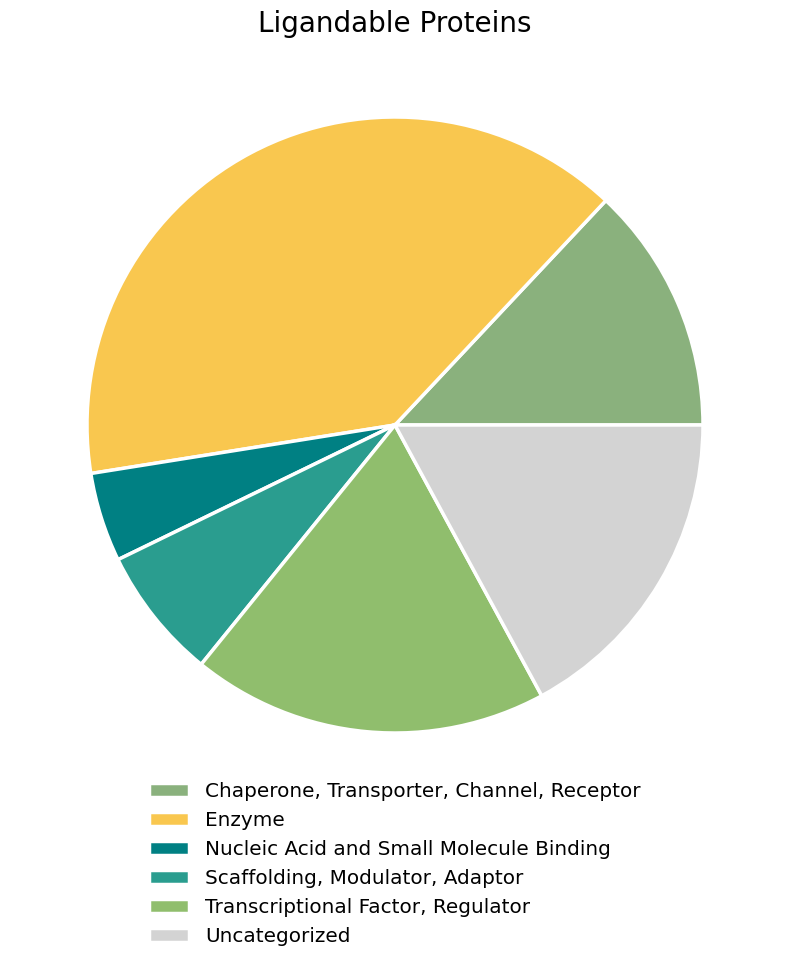

In [60]:
# create pie chart for unique protein ids across the 6 functions
# options: experimental results with functional classes, name of output file, 
# title of figure, list of colors for each group
get_function_pie_chart(df_merged, 
                       output_filename, 
                       title,
                       palette)